# SGDClassifier
---
- LogisticRegression + SGD(확률적경사하강법)를 적용한 모델
- 필수 설정 파라미터
    * loss pram : 이진/다중 손실함수 이름 지정
    

In [89]:
# 모듈 로딩
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt

In [90]:
# 경고 무시 -------------------------------------
# 향후 deprecated 된다는 경고 출력 막음
import warnings
warnings.filterwarnings(action='ignore')

## [1] 데이터 준비

In [91]:
fish=pd.read_csv('fish.csv')

In [92]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [93]:
# 특성 데이터 + 타겟 분리
fish_input=fish[fish.columns[1:]].to_numpy()
fish_target=fish['Species'].to_numpy()

In [94]:
# 학습용, 테스트용 데이터 분리 => 8:2
# random_state : 학습시 랜덤한 동일 데이터로 진행 위해 사용
train_input, test_input, train_target, test_target=train_test_split(
fish_input, fish_target, random_state=42)

In [95]:
# 표준화 : 평균 0, 표준편차 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_input)
train_scaled=scaler.transform(train_input)
test_scaled=scaler.transform(test_input)

## [2] 모델 생성 및 학습

In [96]:
from sklearn.linear_model import SGDClassifier

In [97]:
# 최적화 경사하강법 변경 => BGD -> SGD 손실함수 지정 필요
# loss=손실함수 : 모델에 따라 다름
# max_iter=1000(기본값) : 학습 횟수

sc=SGDClassifier(loss='log',
                max_iter=10,
                random_state=42)

# 학습 진행 fit() : 반복 횟수(max_iter)만큼 학습 진행
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [98]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


In [99]:
# partial_fit() : 1 epoch만 학습 진행
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


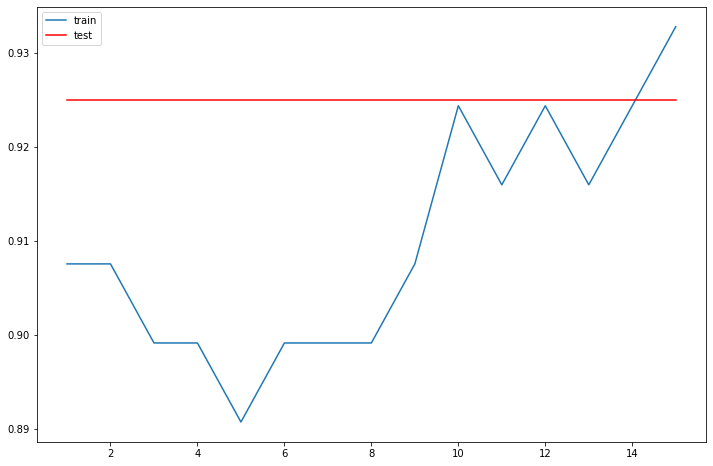

In [100]:
# 최적의 학습 횟수 찾기
train_score=[]
test_score=[]

sc=SGDClassifier(loss='log',
                random_state=42)

sc.fit(train_scaled, train_target)

n=15

for i in range(n):
    sc.partial_fit(train_scaled, train_target)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

plt.figure(figsize=(12, 8))
plt.plot(range(1, n+1), train_score, label='train')
plt.plot(range(1, n+1), test_score, color='red', label='test')
plt.legend()
plt.show()

In [101]:
max(train_score), max(test_score)

(0.9327731092436975, 0.925)

In [102]:
classes=np.unique(train_target)
print('classes :', classes)

classes : ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


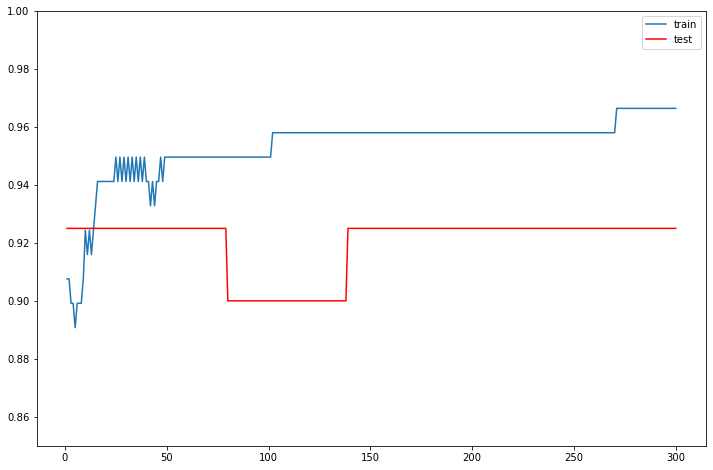

In [109]:
# 최적의 학습 횟수 찾기
train_score=[]
test_score=[]

sc=SGDClassifier(loss='log', 
                random_state=42)

sc.fit(train_scaled, train_target)

n=300

for i in range(n):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

plt.figure(figsize=(12, 8))
plt.plot(range(1, n+1), train_score, label='train')
plt.plot(range(1, n+1), test_score, color='red', label='test')
plt.ylim(0.85, 1)
plt.legend()
plt.show()

In [105]:
# early_stopping : 조기종료 여부 (디폴트 : False)
# n_iter_no_change : n번 동안 변경 되지 않은 경우
# tol : 성능 개선의 기준값
sc=SGDClassifier(loss='log', tol=0.1,
                random_state=42,
                n_iter_no_change=2,
                early_stopping=True)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
print(sc.n_iter_)  # 반복한 횟수

0.6890756302521008
0.775
3
